In [1]:
import numpy as np
import os
import glob
import sys
import torch
from pathlib import Path

current_dir = os.path.dirname(os.path.abspath('__file__'))
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(parent_dir)
grandparent_dir = os.path.abspath(os.path.join(parent_dir, '..'))
sys.path.append(grandparent_dir)
print(grandparent_dir)

import gendata
import learner as ln
from learner.metric.dynamics_metric import (
    calculate_dynamics_metrics,
    plot_dynamics_metrics,
)
from utils import Logger, read_config_file, set_random_seed, tensors_to_numpy

/home/lbu/project/PINN_DE


In [2]:
from configs.config_plot import *

seed = 0
set_random_seed(seed)

os.makedirs(output_dir, exist_ok=True)  

# Logger
logger = Logger(output_dir)
logger.info("#" * 100)

2023-08-25 21:08:36 INFO ####################################################################################################


In [3]:
##################################################################
#
# load data
#
##################################################################
# Dasetset  
# config_file_path = "/home/lbu/project/PINN_DE/configs/train/sp/config_pinn.py"
# config = read_config_file(config_file_path)
# config.dataset_path = "/home/lbu/project/PINN_DE/outputs/data/DynamicSinglePendulumDAE"
# config.load_net_path = "/home/lbu/project/PINN_DE/outputs/task_singlependlum_pinn/train-model.pkl"

config_file_path = "/home/lbu/project/PINN_DE/configs/train/dp/config_pinn.py"
config = read_config_file(config_file_path)
config.dataset_path = "/home/lbu/project/PINN_DE/outputs/data/DynamicDoublePendulumDAE"
config.load_net_path = "/home/lbu/project/PINN_DE/outputs/task_doublependlum_pinn/train-model.pkl"

# config_file_path = "/home/lbu/project/PINN_DE/configs/train/slider_crank/config_pinn.py"
# config = read_config_file(config_file_path)
# config.dataset_path = "/home/lbu/project/PINN_DE/outputs/data/DynamicSliderCrankDAE"
# config.load_net_path = "/home/lbu/project/PINN_DE/outputs/task_slider_crank_pinn/train-model.pkl"

# config_file_path = "/home/lbu/project/PINN_DE/configs/train/two_link/config_pinn.py"
# config = read_config_file(config_file_path)
# config.dataset_path = "/home/lbu/project/PINN_DE/outputs/data/DynamicTwoLinkDAE"
# config.load_net_path = "/home/lbu/project/PINN_DE/outputs/task_TwoLink_pinn/train-model.pkl"

data_args = {
    "config": config,
    "logger": logger,
}
data = ln.data.get_data(**data_args)
train_loader, val_loader = data
y0, y, yt, data_t, physics_t = next(iter(val_loader))

data_t, y, yt = tensors_to_numpy(data_t, y, yt)
q, qt = np.split(y, 2, axis=-1)
qt, qtt = np.split(yt, 2, axis=-1)
all_states = np.concatenate([q, qt, qtt], axis=-1)

##################################################################
#
# Calculate the error
#
##################################################################
# from dynamics import DynamicSinglePendulumDAE
# calculator = DynamicSinglePendulumDAE(config, logger).calculator

from dynamics import DynamicDoublePendulumDAE
calculator = DynamicDoublePendulumDAE(config, logger).calculator

# from dynamics import DynamicSliderCrankDAE
# calculator = DynamicSliderCrankDAE(config, logger).calculator

# from dynamics import DynamicTwoLinkDAE
# calculator = DynamicTwoLinkDAE(config, logger).calculator

(
    metric_value,
    metric_error_value,
    output_log_string,
) = calculate_dynamics_metrics(
    calculator=calculator,
    pred_data=[q, qt, qtt],
    gt_data=[q, qt, qtt],
)
energy_rk4, kinetic, potential, phi, phi_t, phi_tt = metric_value
mean_energy_error, max_energy_error, phi_error, phi_t_error, phi_tt_error = metric_error_value
output_metric = " | ".join(output_log_string)
logger.info(output_metric)

2023-08-25 21:08:36 INFO =================>
2023-08-25 21:08:36 INFO Start get dataset...
2023-08-25 21:08:36 INFO Loading dataset from path: /home/lbu/project/PINN_DE/outputs/data/DynamicDoublePendulumDAE
2023-08-25 21:08:36 INFO DynamicData is loaded
2023-08-25 21:08:37 INFO Mean energy error: 4.6036e-07 | Max energy error: 1.4283e-03 | Phi error: 4.6869e-09 | Phi_t error: 1.0417e-12 | Phi_tt error: 2.8422e-14


In [4]:
##################################################################
#
# load data and net
#
##################################################################
# Dasetset  
# config_file_path = "/home/lbu/project/PINN_DE/configs/train/sp/config_pinn.py"
# config = read_config_file(config_file_path)
# config.dataset_path = "/home/lbu/project/PINN_DE/outputs/data/DynamicSinglePendulumDAE"
# config.load_net_path = "/home/lbu/project/PINN_DE/outputs/task_singlependlum_pinn/train-model.pkl"

config_file_path = "/home/lbu/project/PINN_DE/configs/train/dp/config_pinn.py"
config = read_config_file(config_file_path)
config.dataset_path = "/home/lbu/project/PINN_DE/outputs/data/DynamicDoublePendulumDAE"
config.load_net_path = "/home/lbu/project/PINN_DE/outputs/task_doublependlum_pinn/train-model.pkl"

# config_file_path = "/home/lbu/project/PINN_DE/configs/train/slider_crank/config_pinn.py"
# config = read_config_file(config_file_path)
# config.dataset_path = "/home/lbu/project/PINN_DE/outputs/data/DynamicSliderCrankDAE"
# config.load_net_path = "/home/lbu/project/PINN_DE/outputs/task_slider_crank_pinn/train-model.pkl"

# config_file_path = "/home/lbu/project/PINN_DE/configs/train/two_link/config_pinn.py"
# config = read_config_file(config_file_path)
# config.dataset_path = "/home/lbu/project/PINN_DE/outputs/data/DynamicTwoLinkDAE"
# config.load_net_path = "/home/lbu/project/PINN_DE/outputs/task_TwoLink_pinn/train-model.pkl"

data_args = {
    "config": config,
    "logger": logger,
}
data = ln.data.get_data(**data_args)
train_loader, val_loader = data
y0, y, yt, data_t, physics_t = next(iter(val_loader))

# Net 
net_args = {
    "config": config,
    "logger": logger,
}
net = ln.nn.get_model(**net_args)
q_hat, qt_hat, qtt_hat = net.get_q_qt_qtt(data_t)

##################################################################
#
# Calculate the error
#
##################################################################
# to numpy 
data_t = tensors_to_numpy(data_t)
q, qt = np.split(y, 2, axis=-1)
qt, qtt = np.split(yt, 2, axis=-1)
q, qt, qtt = tensors_to_numpy(q, qt, qtt)
all_states = np.concatenate([q, qt, qtt], axis=-1)

q_hat, qt_hat, qtt_hat = tensors_to_numpy(q_hat, qt_hat, qtt_hat)
all_states_hat = np.concatenate([q_hat, qt_hat, qtt_hat], axis=-1)

# Calculate energy and other terms using the physics model
(
    metric_value,
    metric_error_value,
    output_log_string,
) = calculate_dynamics_metrics(
    calculator=net.right_term_net.calculator,
    pred_data=[q_hat, qt_hat, qtt_hat],
    gt_data=[q, qt, qtt],
)

energy_pinn, kinetic, potential, phi, phi_t, phi_tt = metric_value
mean_energy_error, max_energy_error, phi_error, phi_t_error, phi_tt_error = metric_error_value
output_metric = " | ".join(output_log_string)
logger.info(output_metric)

2023-08-25 21:08:37 INFO =================>
2023-08-25 21:08:37 INFO Start get dataset...
2023-08-25 21:08:37 INFO Loading dataset from path: /home/lbu/project/PINN_DE/outputs/data/DynamicDoublePendulumDAE
2023-08-25 21:08:37 INFO DynamicData is loaded
2023-08-25 21:08:37 INFO =================>
2023-08-25 21:08:37 INFO Start get models...
2023-08-25 21:08:37 INFO PINN loaded
2023-08-25 21:08:37 INFO Number of parameters in model: 1380
2023-08-25 21:08:37 INFO Network loaded from '/home/lbu/project/PINN_DE/outputs/task_doublependlum_pinn/train-model.pkl'
2023-08-25 21:08:37 INFO Mean energy error: 8.2642e-03 | Max energy error: 2.9533e-01 | Phi error: 2.4351e-02 | Phi_t error: 7.6233e-02 | Phi_tt error: 1.1055e+00


Successfully loaded pretrained weights from "/home/lbu/project/PINN_DE/outputs/task_doublependlum_pinn/train-model.pkl"


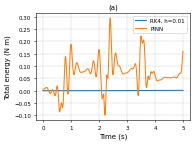

In [5]:
fig, axs = plt.subplots(1, 1, figsize=(4 * 1, 3 * 1), dpi=DPI)

subfig = axs
subfig.set_title('(a)')
plt.xlabel('Time (s)')
plt.ylabel('Total energy (N m)')
subfig.plot(data_t, energy_rk4, '-', label='RK4, h=0.01')
subfig.plot(data_t, energy_pinn, '-', label='PINN')
subfig.legend()

# plt.ylim((-20.2, 20.2))
plt.tight_layout()
